In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
import scipy.constants as const
from numpy.polynomial import Polynomial
from scipy.optimize import curve_fit

In [123]:
#Lines from the excel
VIS_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Visible range\valores_VIS.xlsx")
Spatial_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Spatial range\valores_Spatial.xlsx")

#Separet for colors
#separate for color range, make a list
values_VIS = [ VIS_data[VIS_data['Lambda observed'].between(3800, 4270, inclusive='neither')],
                VIS_data[VIS_data['Lambda observed'].between(4270, 4760, inclusive='neither')],
                VIS_data[VIS_data['Lambda observed'].between(4760, 4970, inclusive='neither')],
                VIS_data[VIS_data['Lambda observed'].between(4970, 5700, inclusive='neither')],
                VIS_data[VIS_data['Lambda observed'].between(5700, 5810, inclusive='neither')],
                VIS_data[VIS_data['Lambda observed'].between(5810, 6180, inclusive='neither')],
                VIS_data[VIS_data['Lambda observed'].between(6180, 7800, inclusive='neither')],
                VIS_data[VIS_data['Lambda observed'].between(7800, 11000, inclusive='neither')]
]

values_SPA = [Spatial_data[Spatial_data['Lambda observed'].between(3800, 4270, inclusive='neither')],
                Spatial_data[Spatial_data['Lambda observed'].between(4270, 4760, inclusive='neither')],
                Spatial_data[Spatial_data['Lambda observed'].between(4760, 4970, inclusive='neither')],
                Spatial_data[Spatial_data['Lambda observed'].between(4970, 5700, inclusive='neither')],
                Spatial_data[Spatial_data['Lambda observed'].between(5700, 5810, inclusive='neither')],
                Spatial_data[Spatial_data['Lambda observed'].between(5810, 6180, inclusive='neither')],
                Spatial_data[Spatial_data['Lambda observed'].between(6180, 7800, inclusive='neither')],
                Spatial_data[Spatial_data['Lambda observed'].between(7800, 11000, inclusive='neither')]
]

#Colors for the fit
#colors for the plot
colors = ['violet','blue','cyan','green','yellow','orange','red','brown']
colors_fit = ['darkviolet','darkblue','darkcyan','darkgreen','gold','darkorange','darkred','sienna']

VIS_data

,Lambda natural,Lambda observed,Flux,Velocity,2nd Derivate,3rd Derivate,Blueshift,3rd Derivate (m/s)
0,4060.8601,4060.8637,0.319656,-367,516.240027,0.002124,265.769522,156.775301
1,4068.4198,4068.4255,0.209893,-213,305.398066,-0.005535,420.019834,-407.860737
2,4080.9899,4080.9941,0.214181,-324,412.428492,-0.004021,308.535026,-295.361007
3,4086.1573,4086.1634,0.220922,-185,317.419952,-0.005171,447.543709,-379.361256
4,4088.2476,4088.2510,0.288719,-384,466.796632,0.000710,249.323049,52.068450
...,...,...,...,...,...,...,...,...
614,10425.8870,10425.8953,0.865886,-394,27.385089,-0.014712,238.663377,-423.049016
615,10426.6020,10426.6082,0.828438,-455,34.097704,0.004307,178.266442,123.851268
616,10535.1220,10535.1327,0.693736,-329,48.369722,0.005233,304.484305,148.915995
617,10580.0390,10580.0488,0.901829,-355,15.526598,-0.144127,277.689533,-4083.941064


### Sharpeness

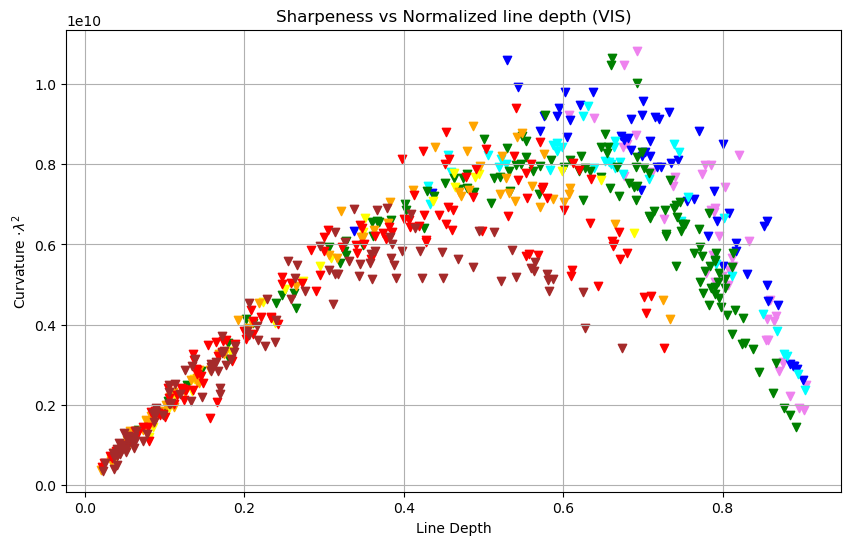

In [124]:
#Granulation pattern
fig8, ax = plt.subplots(1,1,figsize=(10,6))

for i in range(0,len(values_VIS)):  
    ax.scatter(1-values_VIS[i]['Flux'],values_VIS[i]['2nd Derivate']*values_VIS[i]['Lambda observed']*values_VIS[i]['Lambda observed'], color=colors[i],marker='v')

ax.set_title('Sharpeness vs Normalized line depth (VIS)')
ax.set_xlabel(r'Line Depth')
ax.set_ylabel(r'Curvature $\cdot\lambda^2$ ')
ax.grid()
# fig8.savefig('Blueshift.png')

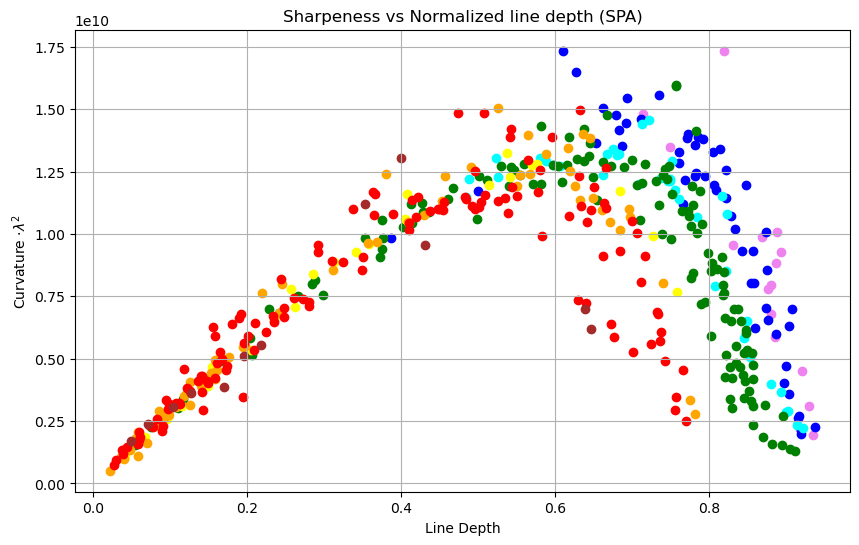

In [125]:
#Granulation pattern
fig8, ax = plt.subplots(1,1,figsize=(10,6))

for i in range(0,len(values_SPA)):  
    ax.scatter(1-values_SPA[i]['Flux'],values_SPA[i]['2nd Derivate']*values_SPA[i]['Lambda observed']*values_SPA[i]['Lambda observed'], color=colors[i],marker='o')


ax.set_title('Sharpeness vs Normalized line depth (SPA)')
ax.set_xlabel(r'Line Depth')
ax.set_ylabel(r'Curvature $\cdot\lambda^2$ ')
ax.grid()
# fig8.savefig('Blueshift.png')

### Velocity analysis

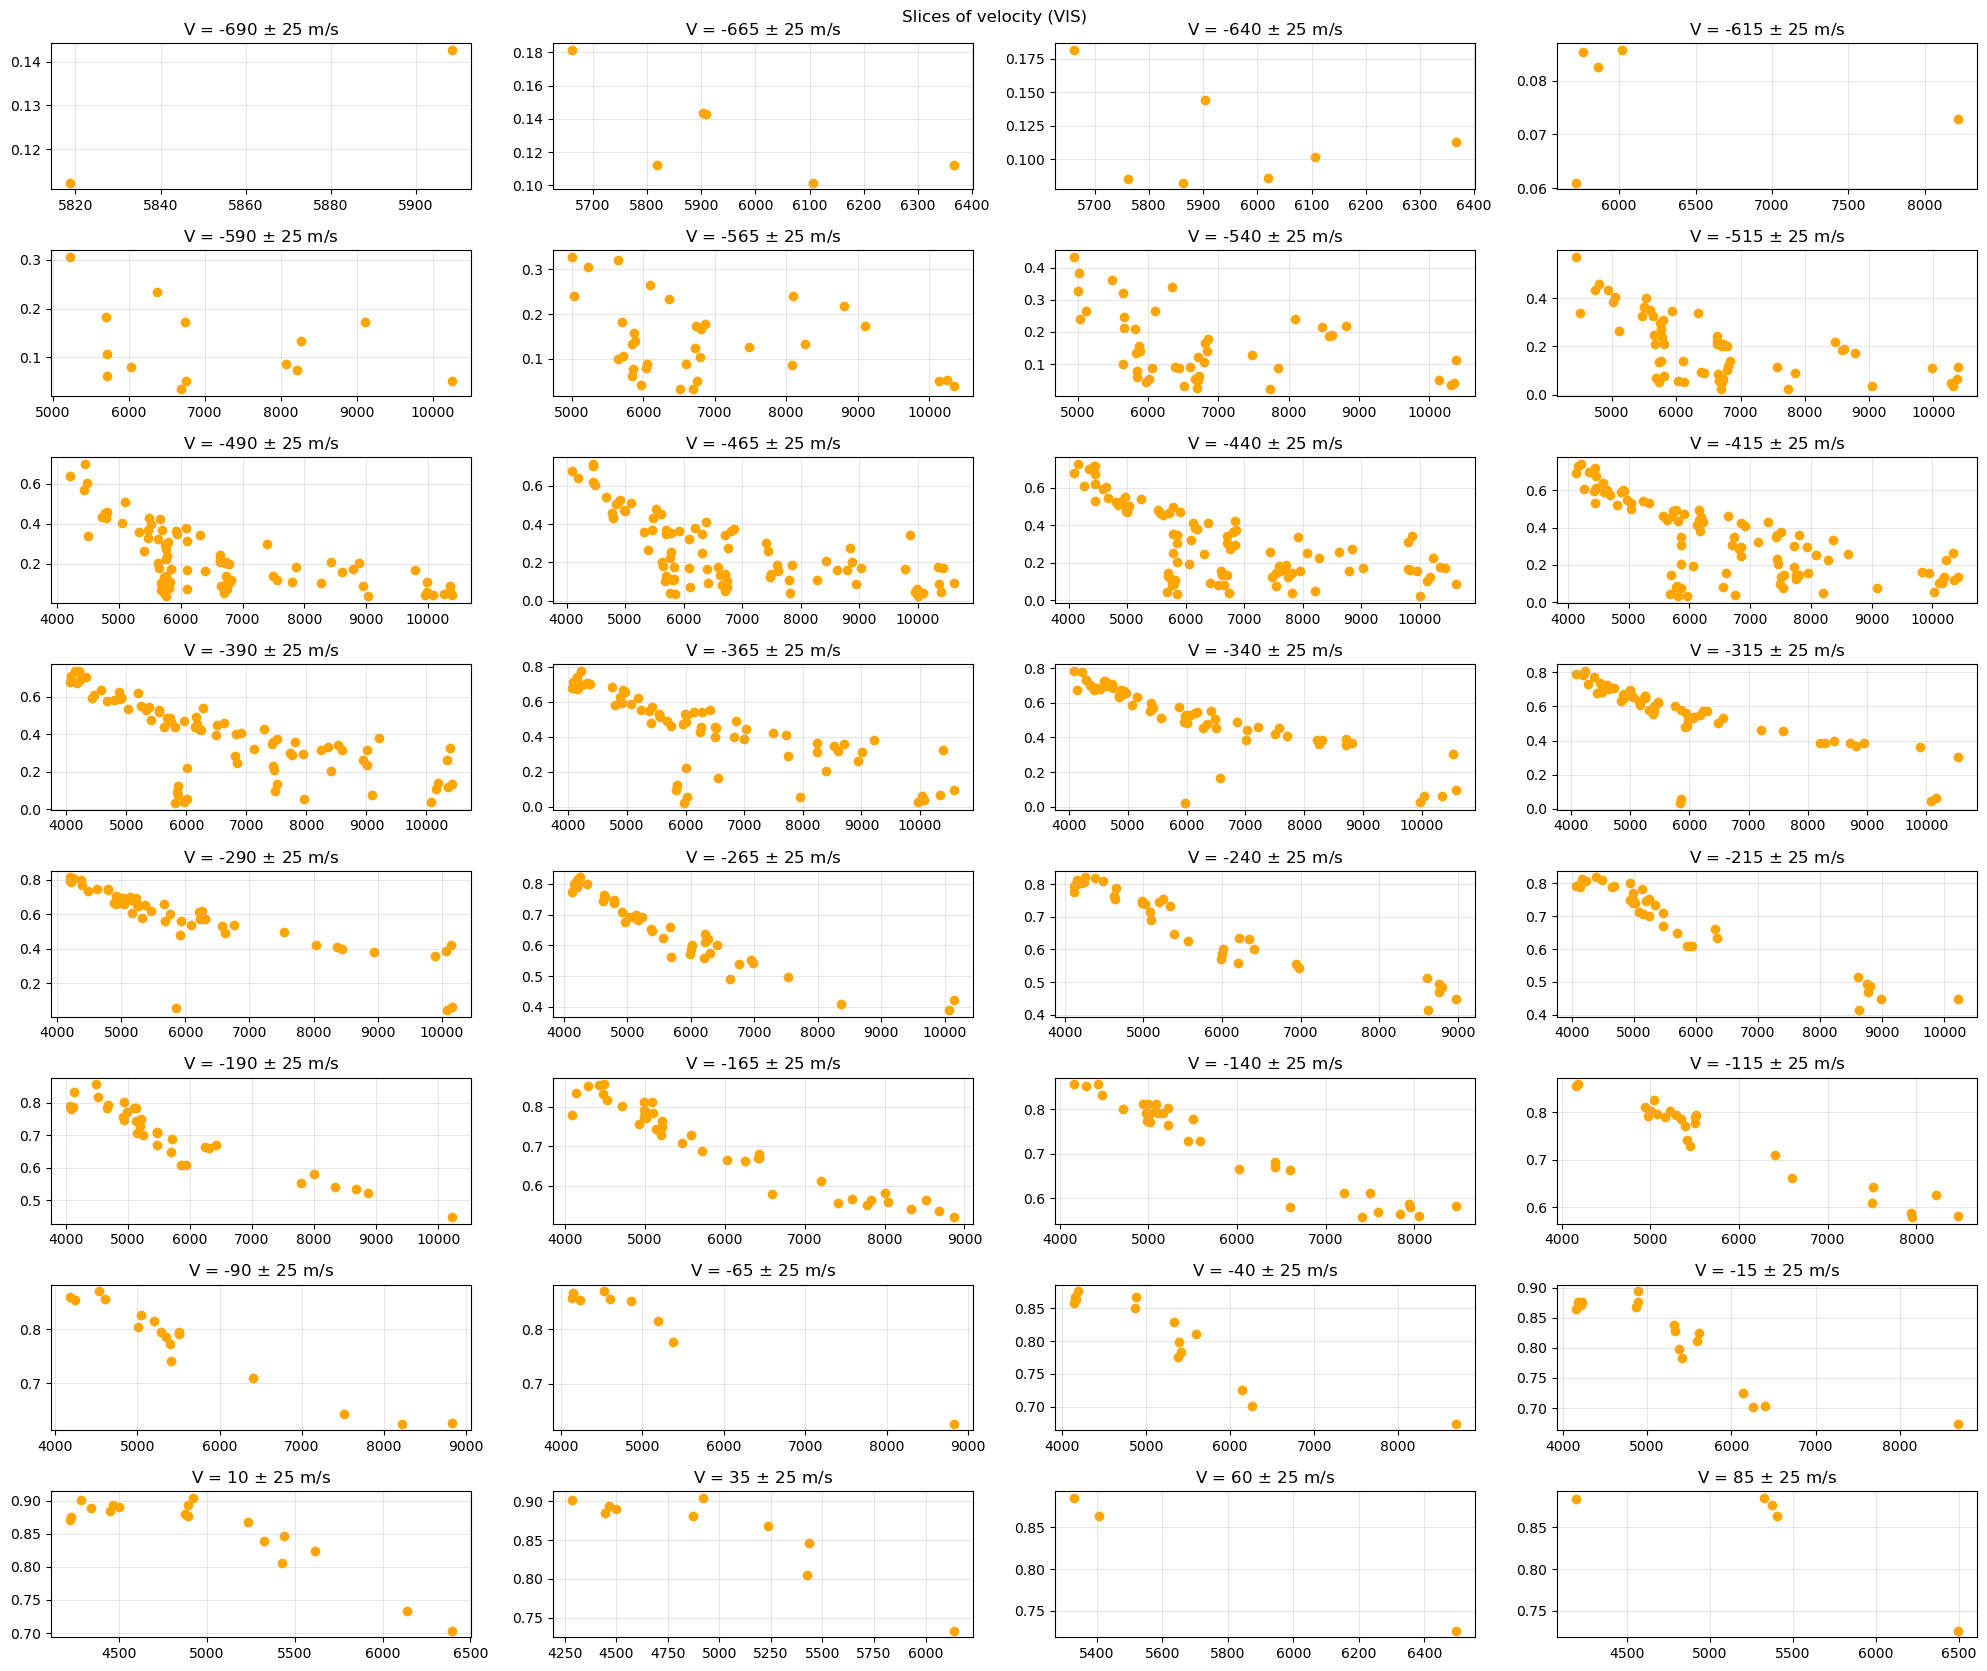

In [182]:
VIS_listed = VIS_data.sort_values('Velocity', ascending=False, na_position='first').reset_index(drop=True)
velocity_VIS = []
markers = np.arange(min(VIS_listed['Velocity'])+25,max(VIS_listed['Velocity'])-25,25)
for each in markers:
    velocity_VIS.append(VIS_listed[VIS_listed['Velocity'].between(each-25, each+25, inclusive='neither')])

fig, axes = plt.subplots(8, 4, figsize=(20, 17))
fig.suptitle('Slices of velocity (VIS)')

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(markers):
        ax.scatter(velocity_VIS[i]['Lambda observed'],1-velocity_VIS[i]['Flux'],color='orange')
        ax.set_title(f'V = {markers[i]} $\pm$ 25 m/s')
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

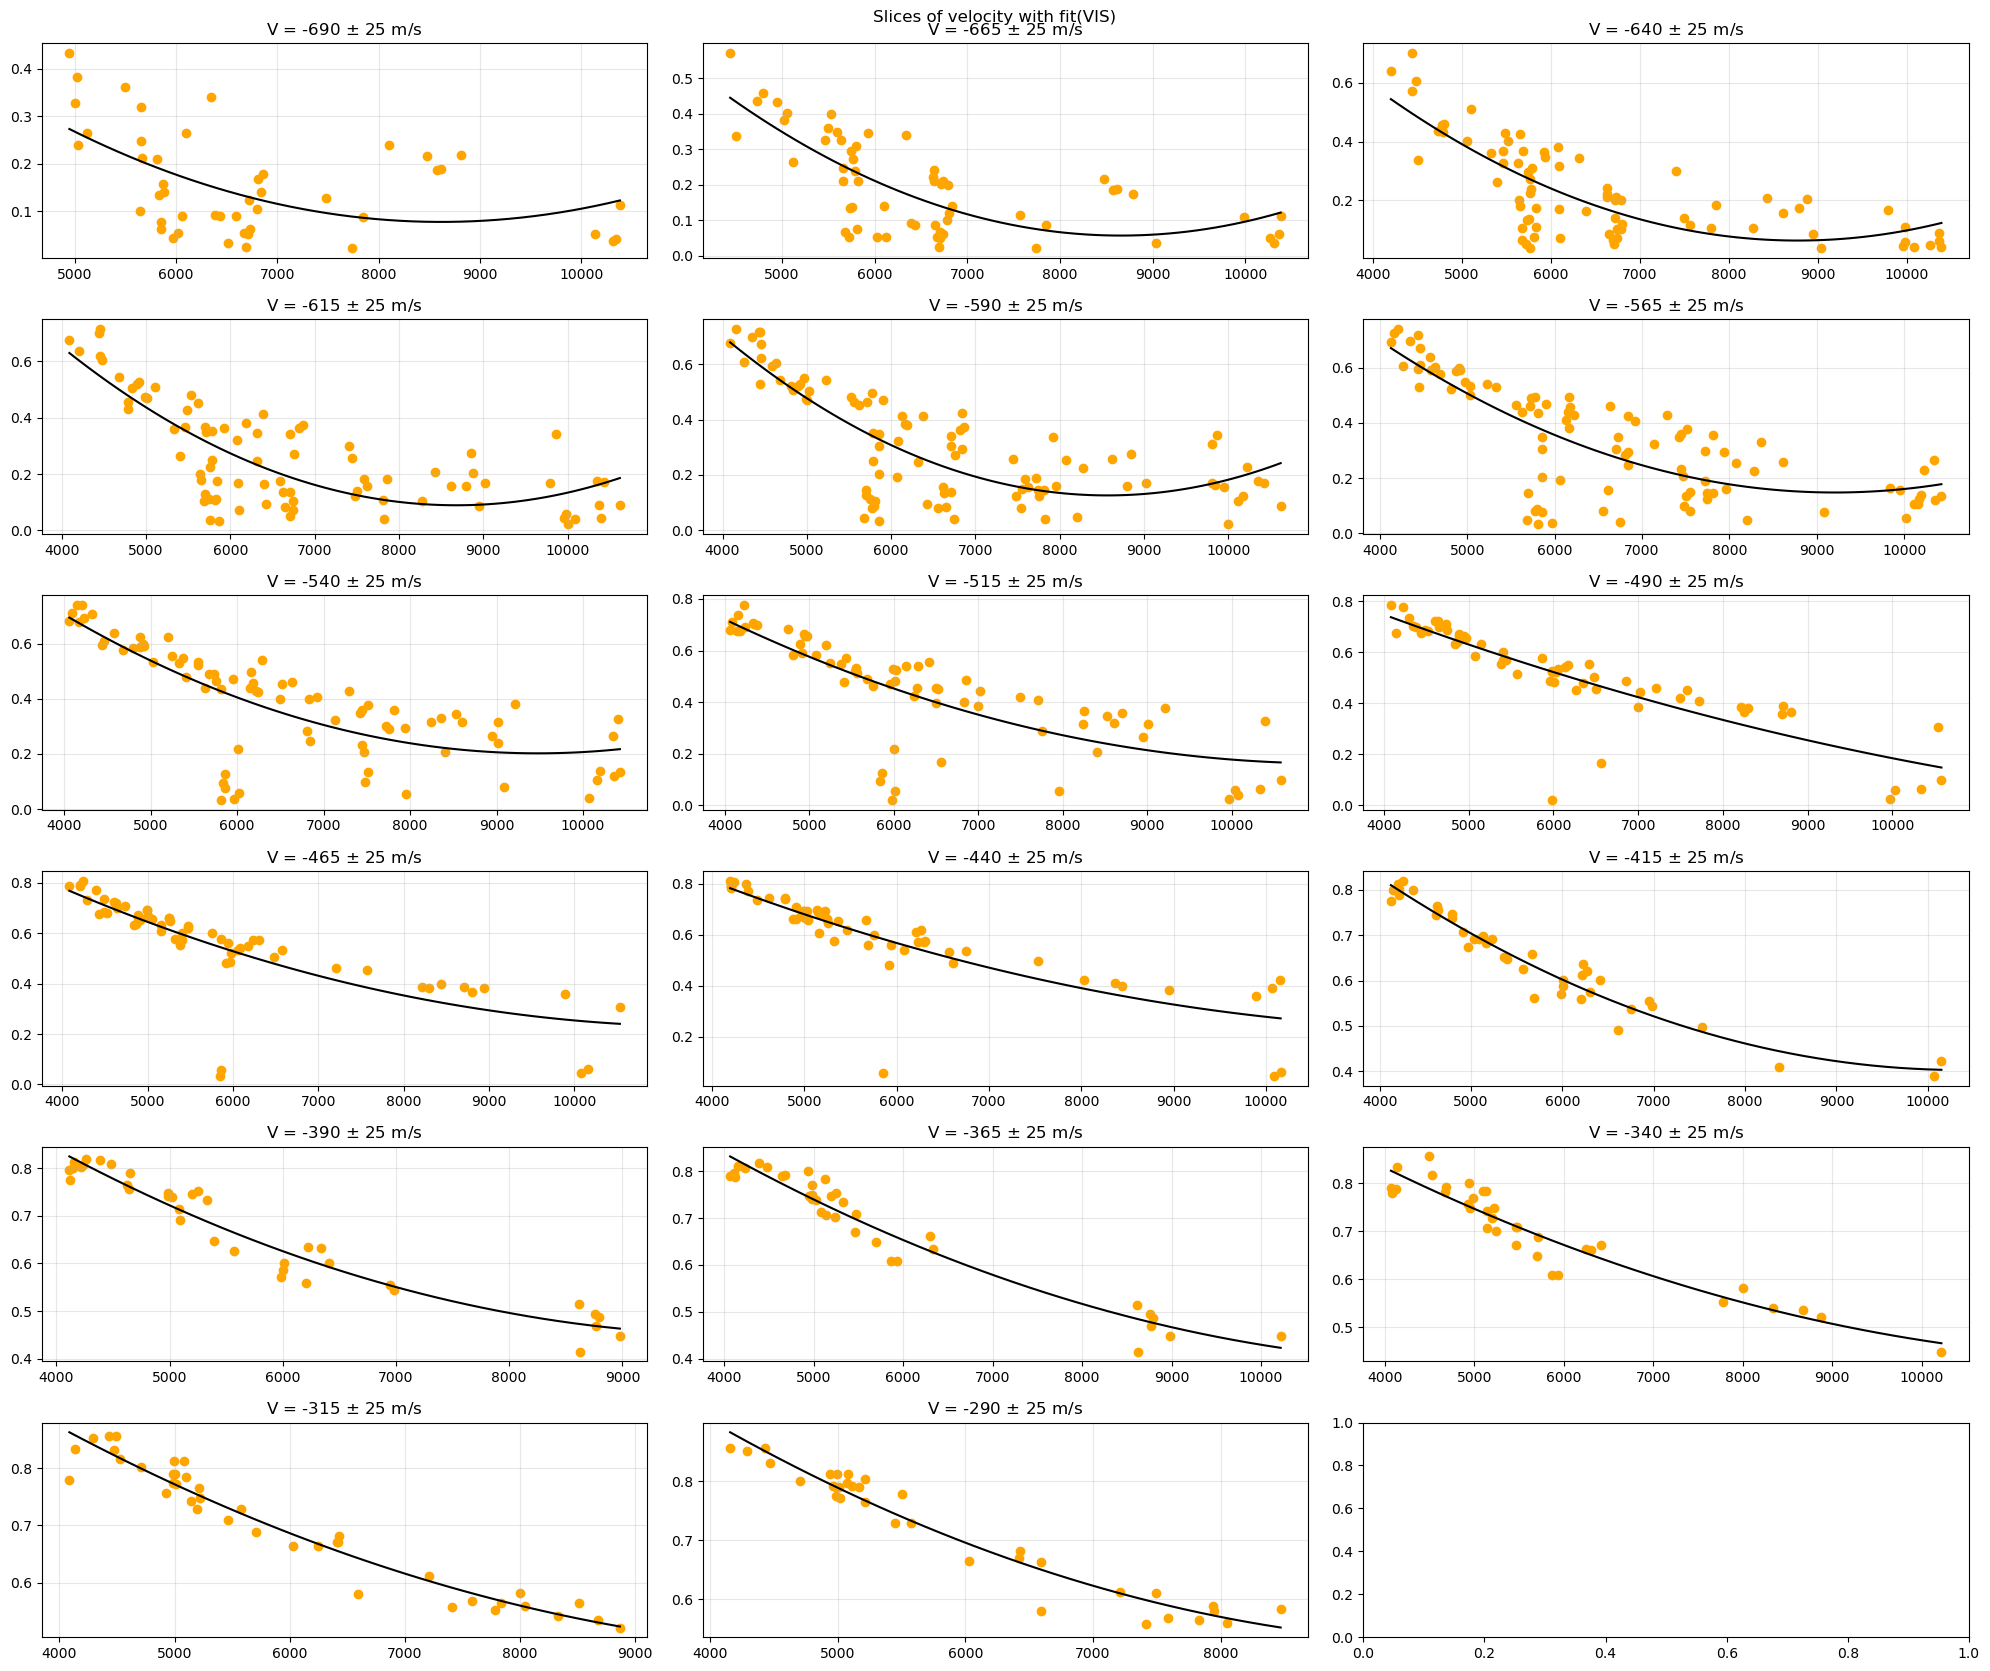

In [128]:
#Polynomial 1 order fit
fits_VIS = []
values_param = []
for i in range(6,23):
    pol = Polynomial.fit(velocity_VIS[i]['Lambda observed'],1-velocity_VIS[i]['Flux'], 2)
    param = pol.convert().coef
    values_flux = np.linspace(min(velocity_VIS[i]['Lambda observed']), max(velocity_VIS[i]['Lambda observed']), len(velocity_VIS[i]['Lambda observed']))
    flux_fit = poly.polyval(values_flux,param)

    fits_VIS.append([values_flux,flux_fit])
    values_param.append(pd.DataFrame(param))

values_param = pd.concat(values_param,axis=1).T.reset_index(drop=True)
values_param.columns = ['Pendiente','B','C']
velocity_VIS = velocity_VIS[6:23]

fig, axes = plt.subplots(6, 3, figsize=(20, 17))
fig.suptitle('Slices of velocity with fit(VIS)')
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(fits_VIS):
        ax.scatter(velocity_VIS[i]['Lambda observed'],1-velocity_VIS[i]['Flux'],color='orange')
        ax.plot(fits_VIS[i][0],fits_VIS[i][1],color='k')
        ax.set_title(f'V = {markers[i]} $\pm$ 25 m/s')
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [129]:
values_param

,Pendiente,B,C
0,1.157373,-0.000251,1.454772e-08
1,1.693274,-0.000378,2.182227e-08
2,1.834108,-0.000403,2.297931e-08
3,2.022633,-0.000445,2.566302e-08
4,2.149702,-0.000473,2.758363e-08
5,1.866689,-0.000373,2.027262e-08
6,1.708543,-0.000318,1.677386e-08
7,1.515923,-0.000242,1.083603e-08
8,1.309186,-0.000159,4.679101e-09
9,1.511495,-0.000221,9.528771e-09


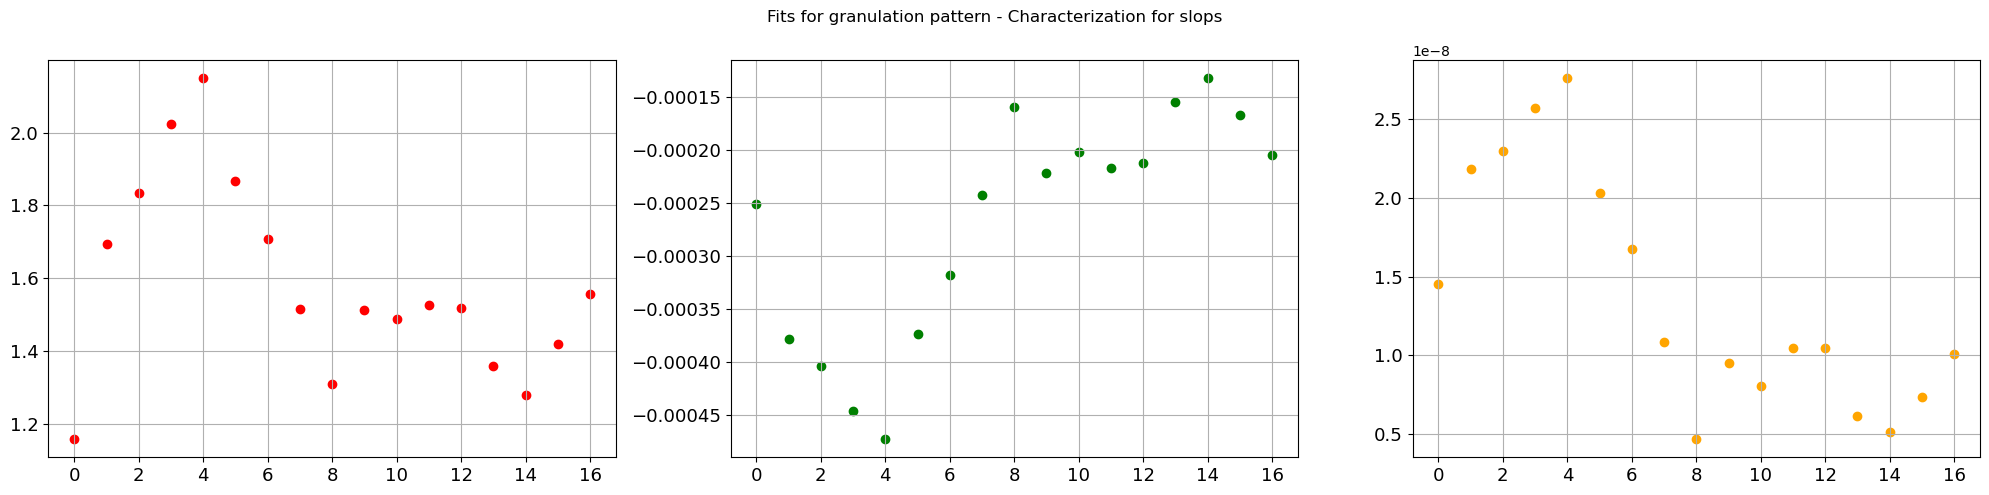

In [132]:
#Plot of raw data
fig1, axis1 = plt.subplots(1,3, figsize = (20, 5))
ax1 = axis1[0]
ax2 = axis1[1]
ax3 = axis1[2]

fig1.suptitle(r'Fits for granulation pattern - Characterization for slops')
x = np.arange(0,len(values_param['B']),1)

ax1.scatter(x,values_param['Pendiente'],label='Término cuadrado',color='red')
ax2.scatter(x,values_param['B'],label='Término lineal',color='green')
ax3.scatter(x,values_param['C'],label='Punto de corte',color='orange')


ax1.grid()
ax1.tick_params(axis='both',labelsize=13)

ax2.grid()
ax2.tick_params(axis='both',labelsize=13)

ax3.grid()
ax3.tick_params(axis='both',labelsize=13)

fig1.tight_layout()



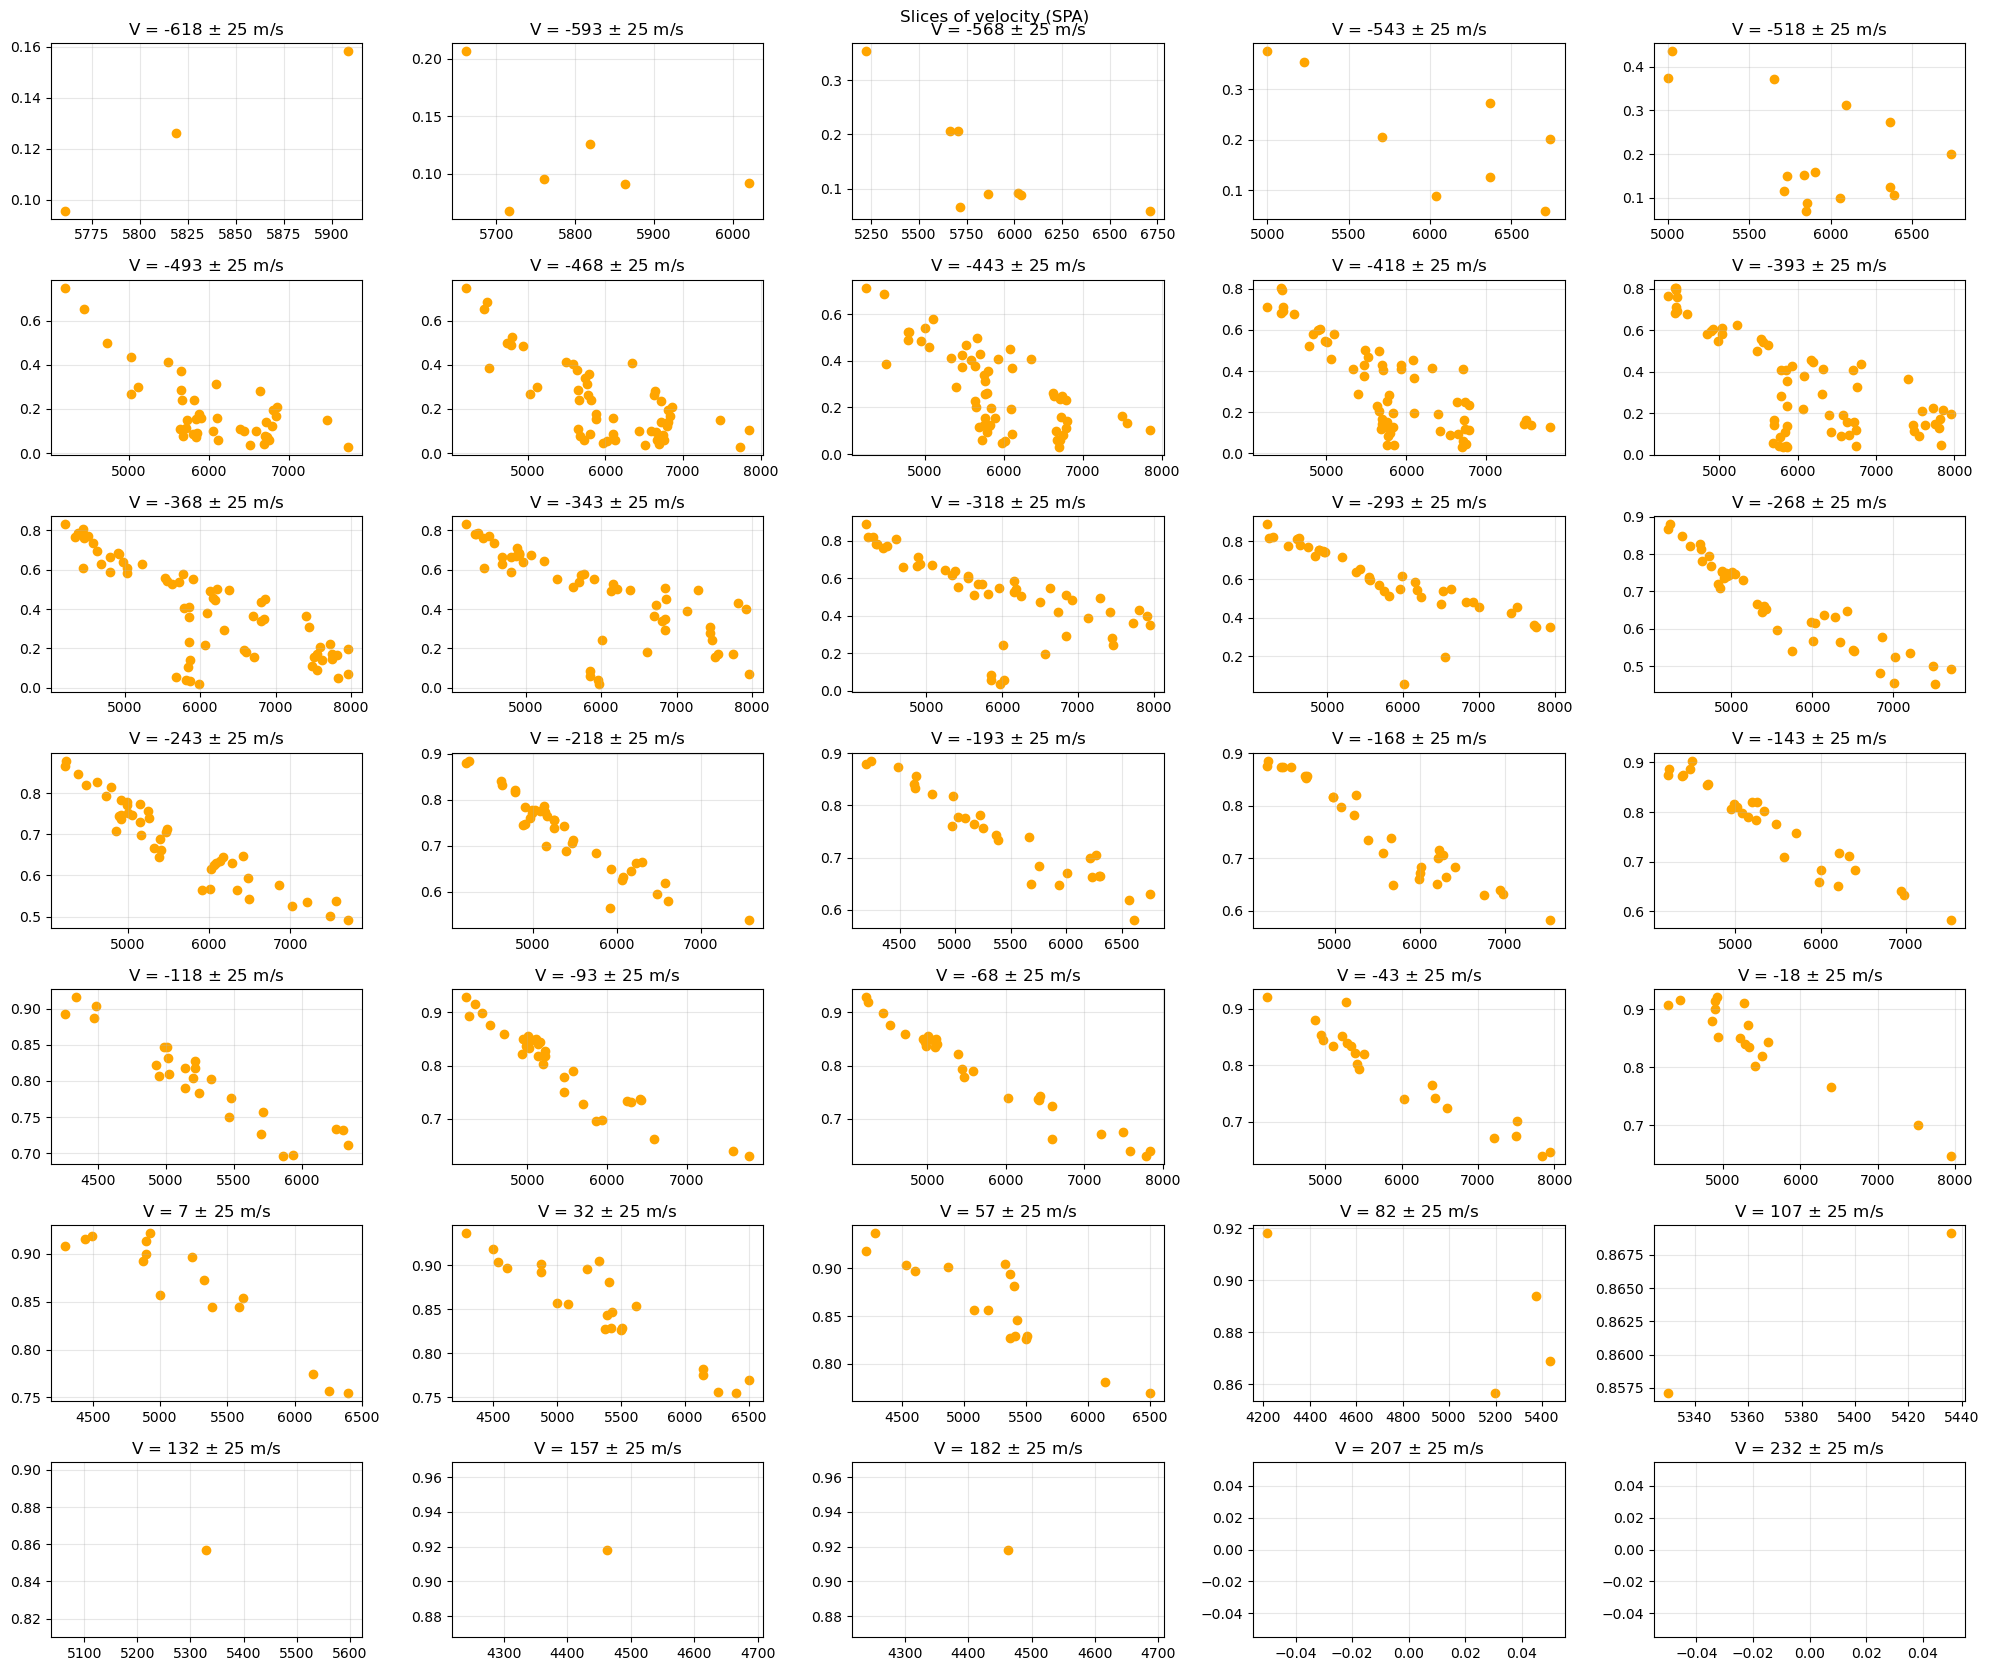

In [255]:
#For the spatial
SPA_listed = Spatial_data.sort_values('Velocity', ascending=False, na_position='first').reset_index(drop=True)
velocity_SPA = []
markers = np.arange(min(SPA_listed['Velocity'])+25,max(SPA_listed['Velocity'])-25,25)
for each in markers:
    velocity_SPA.append(SPA_listed[SPA_listed['Velocity'].between(each-25, each+25, inclusive='neither')])

fig, axes = plt.subplots(7, 5, figsize=(20, 17))
fig.suptitle('Slices of velocity (SPA)')

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(markers):
        ax.scatter(velocity_SPA[i]['Lambda observed'],1-velocity_SPA[i]['Flux'],color='orange')
        ax.set_title(f'V = {markers[i]} $\pm$ 25 m/s')
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

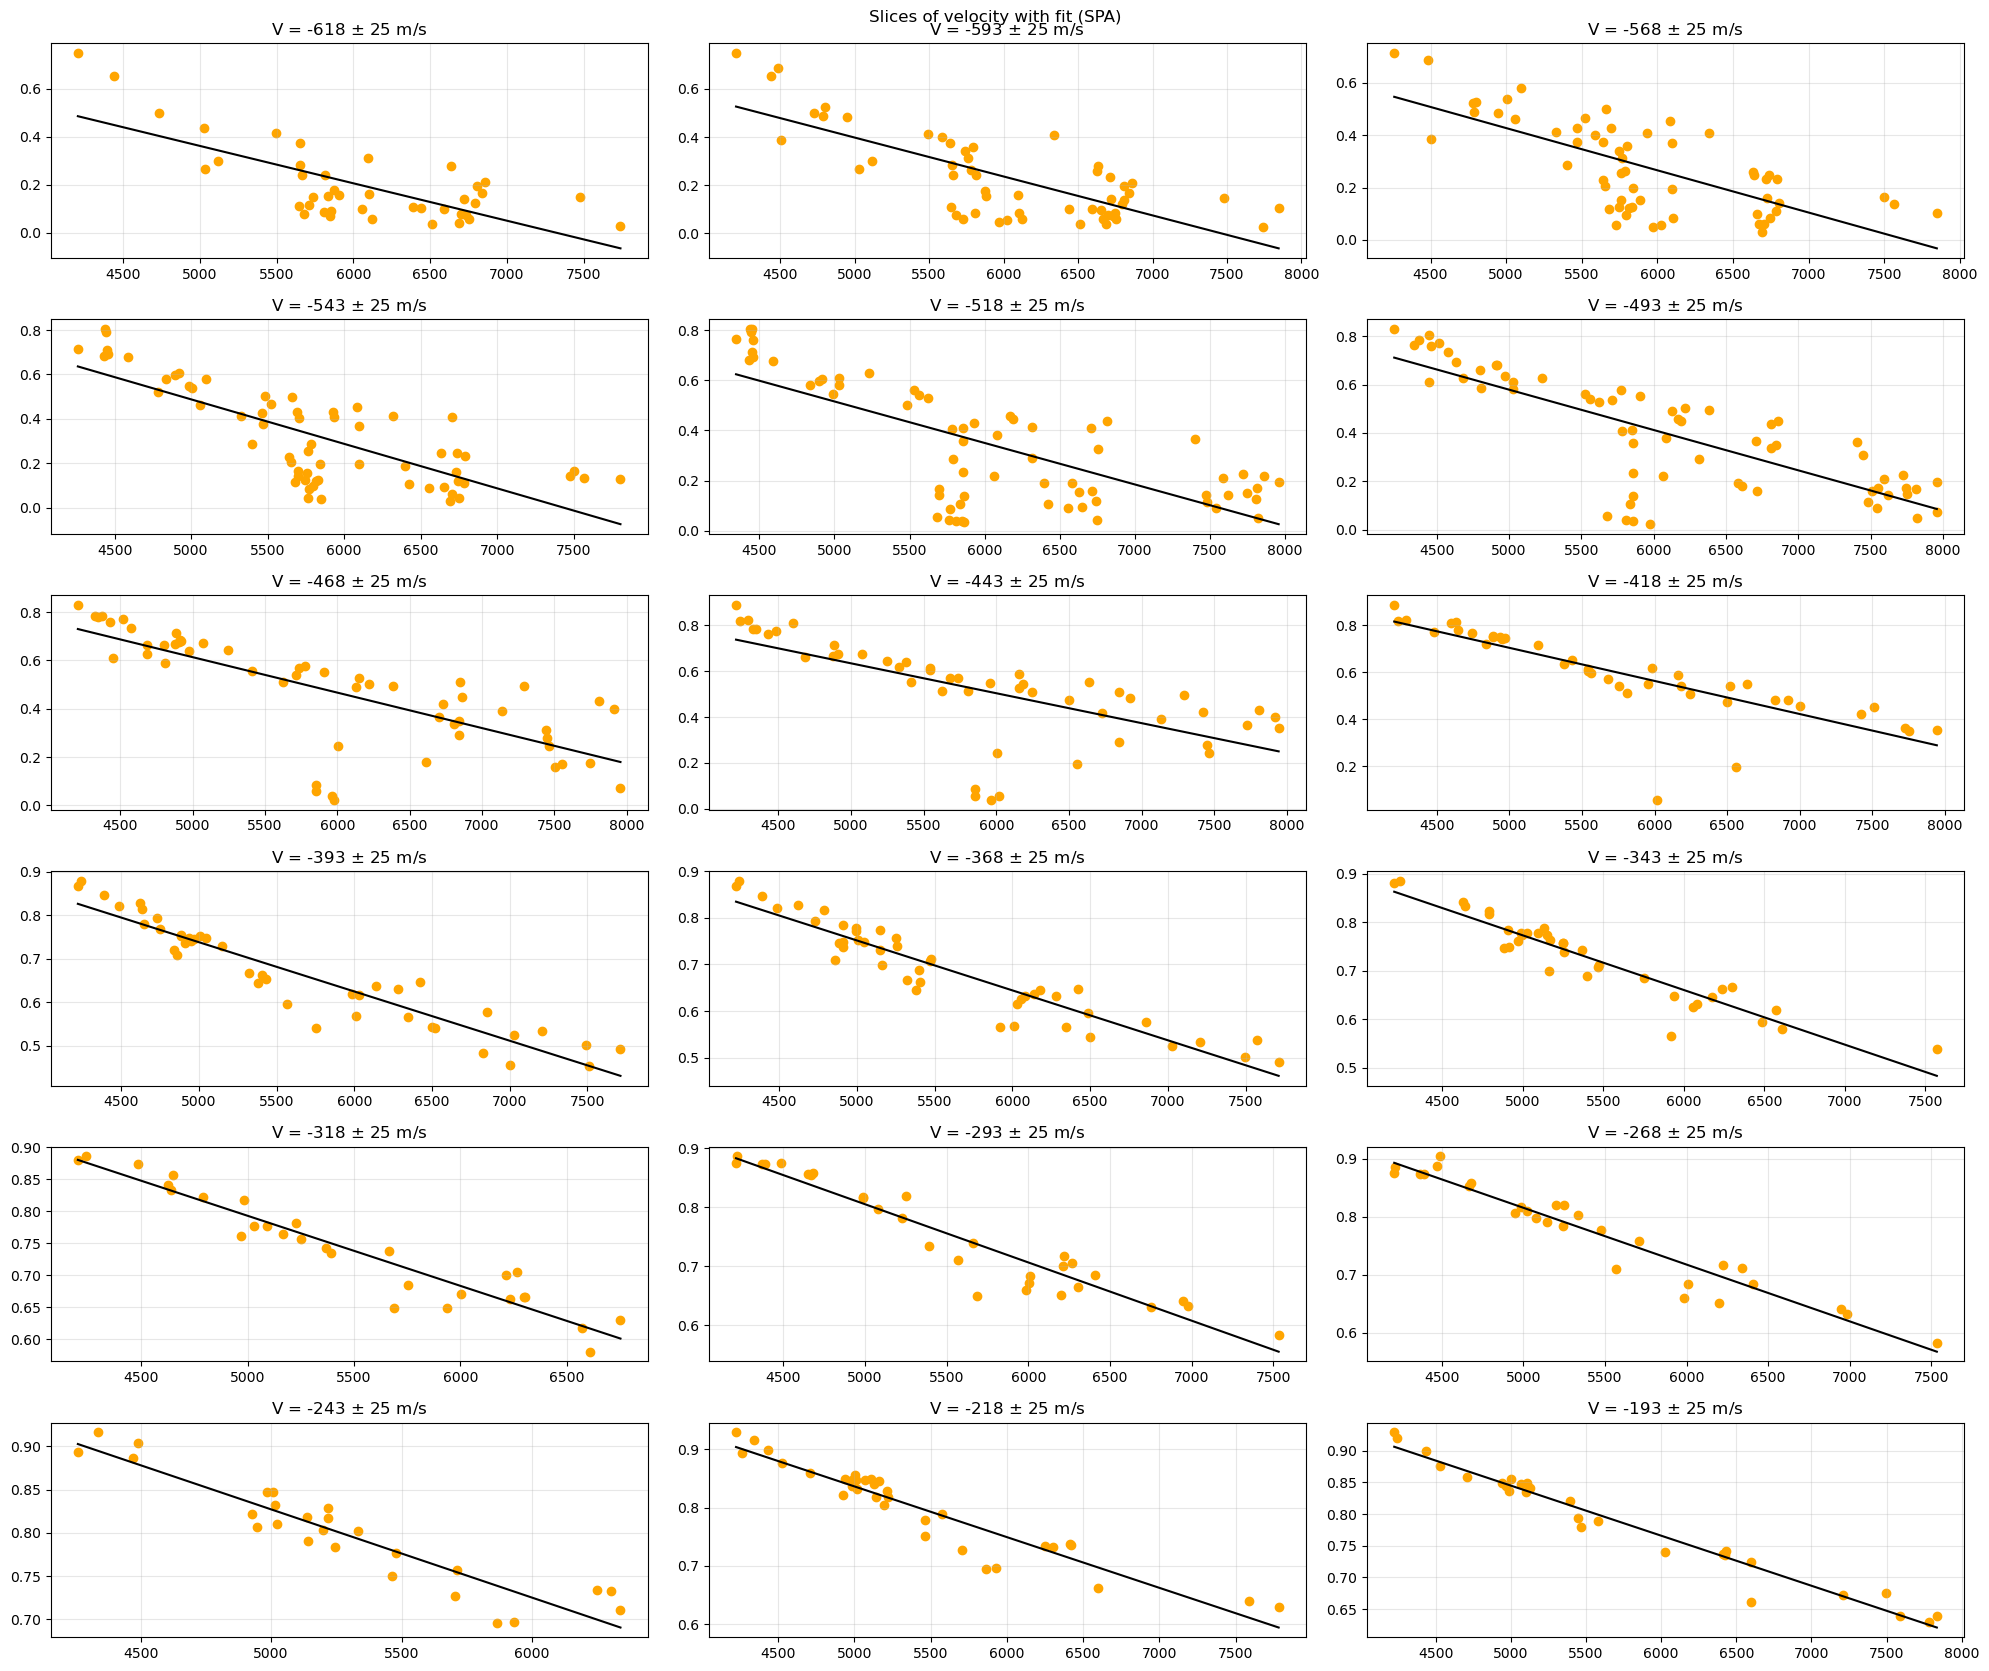

In [134]:
#Polynomial 1 order fit
fits_SPA = []
values_param = []
for i in range(5,27):
    pol = Polynomial.fit(velocity_SPA[i]['Lambda observed'],1-velocity_SPA[i]['Flux'], 1)
    param = pol.convert().coef
    values_flux = np.linspace(min(velocity_SPA[i]['Lambda observed']), max(velocity_SPA[i]['Lambda observed']), len(velocity_SPA[i]['Lambda observed']))
    flux_fit = poly.polyval(values_flux,param)

    fits_SPA.append([values_flux,flux_fit])
    values_param.append(pd.DataFrame(param))

values_param = pd.concat(values_param,axis=1).T.reset_index(drop=True)
values_param.columns = ['Pendiente','B']
velocity_SPA = velocity_SPA[5:27]

fig, axes = plt.subplots(6, 3, figsize=(20, 17))
fig.suptitle('Slices of velocity with fit (SPA)')
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(fits_SPA):
        ax.scatter(velocity_SPA[i]['Lambda observed'],1-velocity_SPA[i]['Flux'],color='orange')
        ax.plot(fits_SPA[i][0],fits_SPA[i][1],color='k')
        ax.set_title(f'V = {markers[i]} $\pm$ 25 m/s')
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [135]:
values_param

,Pendiente,B
0,1.140902,-0.000156
1,1.206282,-0.000162
2,1.234336,-0.000161
3,1.491018,-0.000201
4,1.344060,-0.000166
5,1.414147,-0.000167
6,1.347424,-0.000147
7,1.283627,-0.000130
8,1.410385,-0.000141
9,1.305905,-0.000114


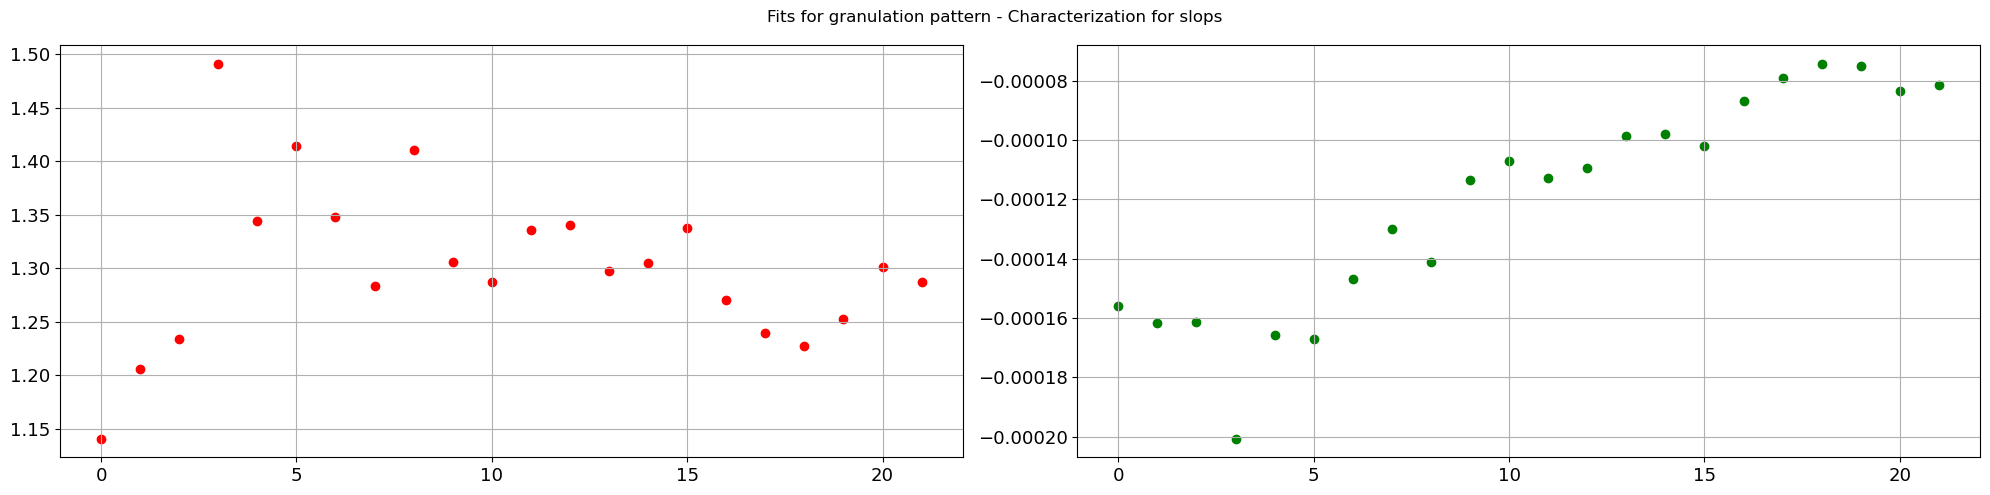

In [136]:
#Plot of raw data
fig1, axis1 = plt.subplots(1,2, figsize = (20, 5))
ax1 = axis1[0]
ax2 = axis1[1]

fig1.suptitle(r'Fits for granulation pattern - Characterization for slops')
x = np.arange(0,len(values_param['B']),1)

ax1.scatter(x,values_param['Pendiente'],label='Término lineal',color='red')
ax2.scatter(x,values_param['B'],label='Punto de corte',color='green')


ax1.grid()
ax1.tick_params(axis='both',labelsize=13)

ax2.grid()
ax2.tick_params(axis='both',labelsize=13)


fig1.tight_layout()



## Intento de separar pendientes

In [ ]:
# New_Data_VIS = []

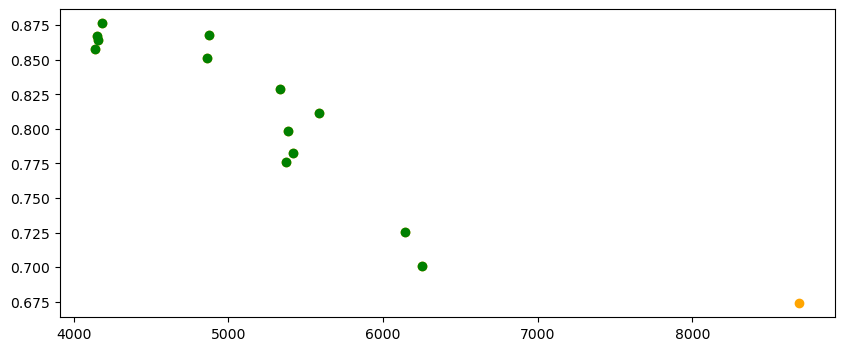

In [248]:
i = 26
fig, axes = plt.subplots(1, 1, figsize=(10, 4))
axes.scatter(velocity_VIS[i]['Lambda observed'],1-velocity_VIS[i]['Flux'],color='orange')
new_Data = velocity_VIS[i][velocity_VIS[i]['Lambda observed'].between(4000,6900)]
axes.scatter(new_Data['Lambda observed'],1-new_Data['Flux'],color='green')

# New_Data_VIS.append(new_Data)

In [251]:
len(New_Data_VIS)

19

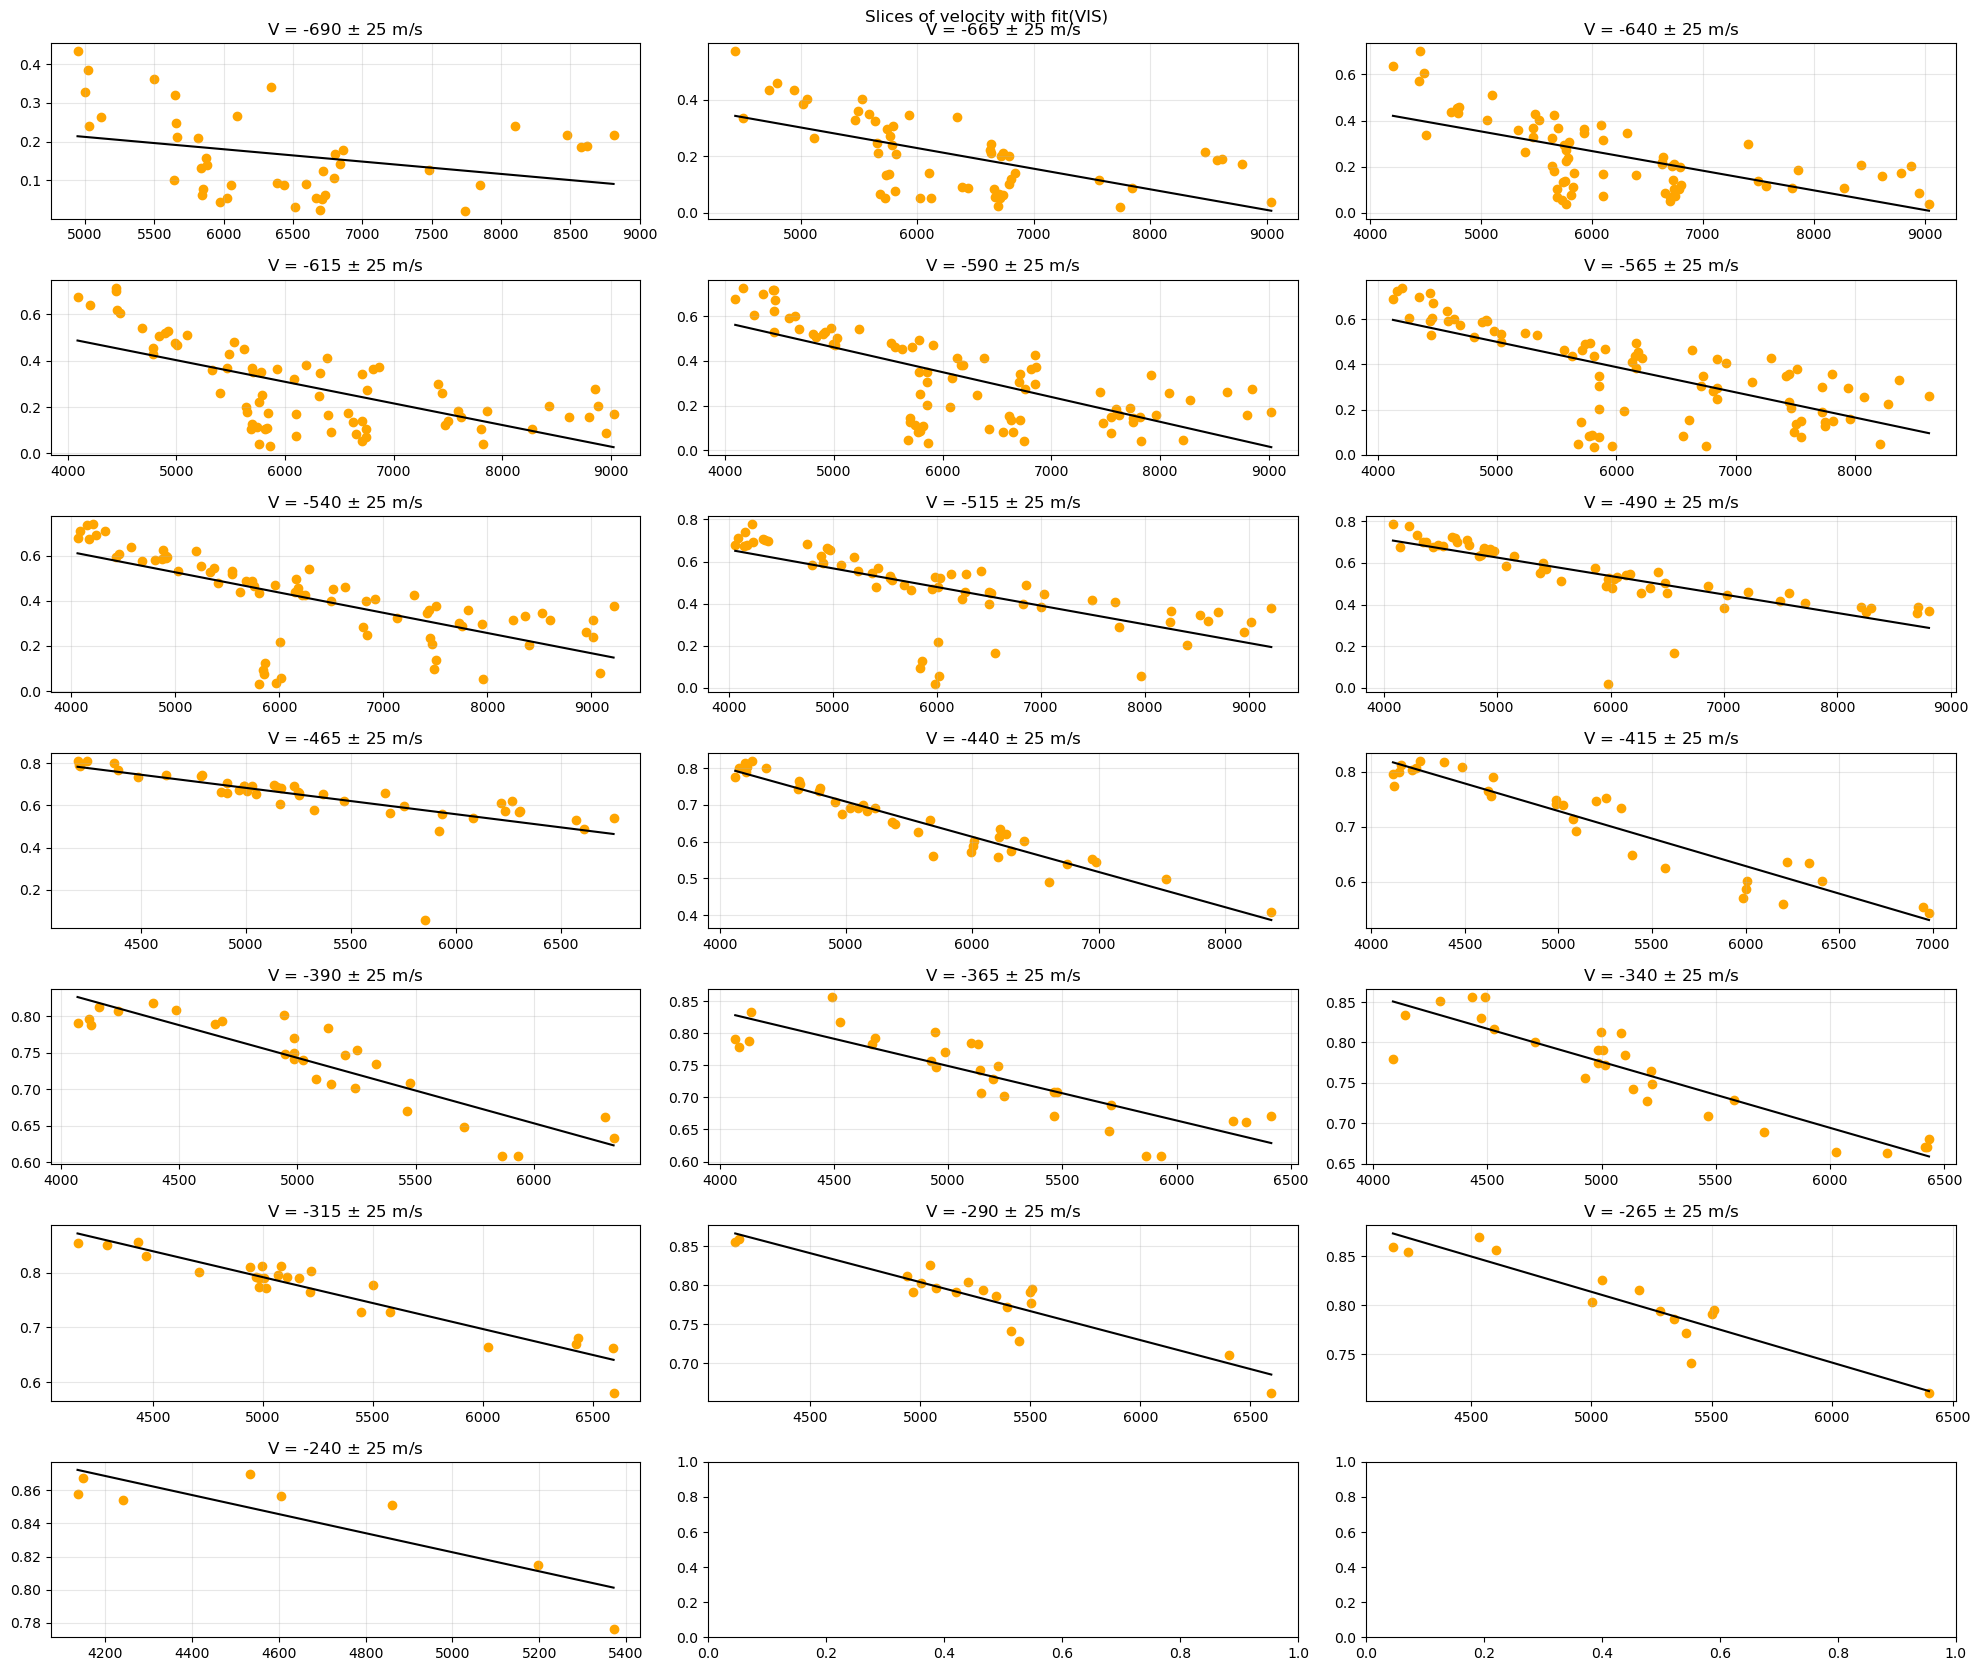

In [252]:
#Polynomial 1 order fit
values_param = []
fits_VIS = []
for i in range(0,len(New_Data_VIS)):
    pol = Polynomial.fit(New_Data_VIS[i]['Lambda observed'],1-New_Data_VIS[i]['Flux'], 1)
    param = pol.convert().coef
    values_flux = np.linspace(min(New_Data_VIS[i]['Lambda observed']), max(New_Data_VIS[i]['Lambda observed']), len(New_Data_VIS[i]['Lambda observed']))
    flux_fit = poly.polyval(values_flux,param)

    fits_VIS.append([values_flux,flux_fit])
    values_param.append(pd.DataFrame(param))

values_param = pd.concat(values_param,axis=1).T.reset_index(drop=True)
values_param.columns = ['Pendiente','B']

fig, axes = plt.subplots(7, 3, figsize=(20, 17))
fig.suptitle('Slices of velocity with fit(VIS)')
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(fits_VIS):
        ax.scatter(New_Data_VIS[i]['Lambda observed'],1-New_Data_VIS[i]['Flux'],color='orange')
        ax.plot(fits_VIS[i][0],fits_VIS[i][1],color='k')
        ax.set_title(f'V = {markers[i]} $\pm$ 25 m/s')
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [253]:
values_param

,Pendiente,B
0,0.371539,-0.000032
1,0.666873,-0.000073
2,0.778756,-0.000085
3,0.869320,-0.000093
4,1.014401,-0.000111
5,1.060019,-0.000112
6,0.976051,-0.000090
7,1.010836,-0.000089
8,1.068995,-0.000089
9,1.307175,-0.000125


In [ ]:
# New_Data_SPA = []

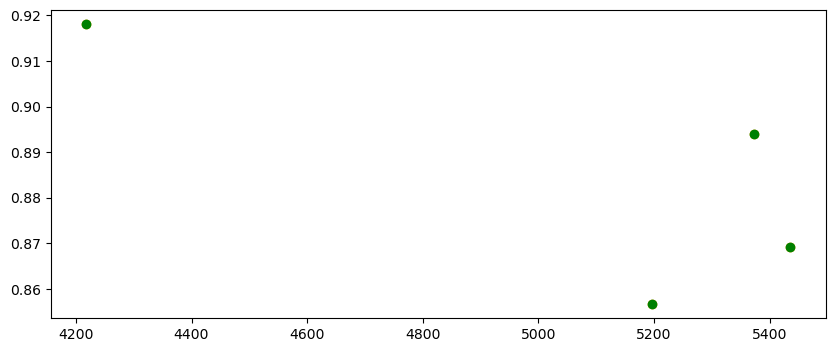

In [327]:
i = 28
fig, axes = plt.subplots(1, 1, figsize=(10, 4))
axes.scatter(velocity_SPA[i]['Lambda observed'],1-velocity_SPA[i]['Flux'],color='orange')
new_Data = velocity_SPA[i][velocity_SPA[i]['Lambda observed'].between(4000,5700)]
axes.scatter(new_Data['Lambda observed'],1-new_Data['Flux'],color='green')

# New_Data_SPA.append(new_Data)

In [328]:
len(New_Data_SPA)

22

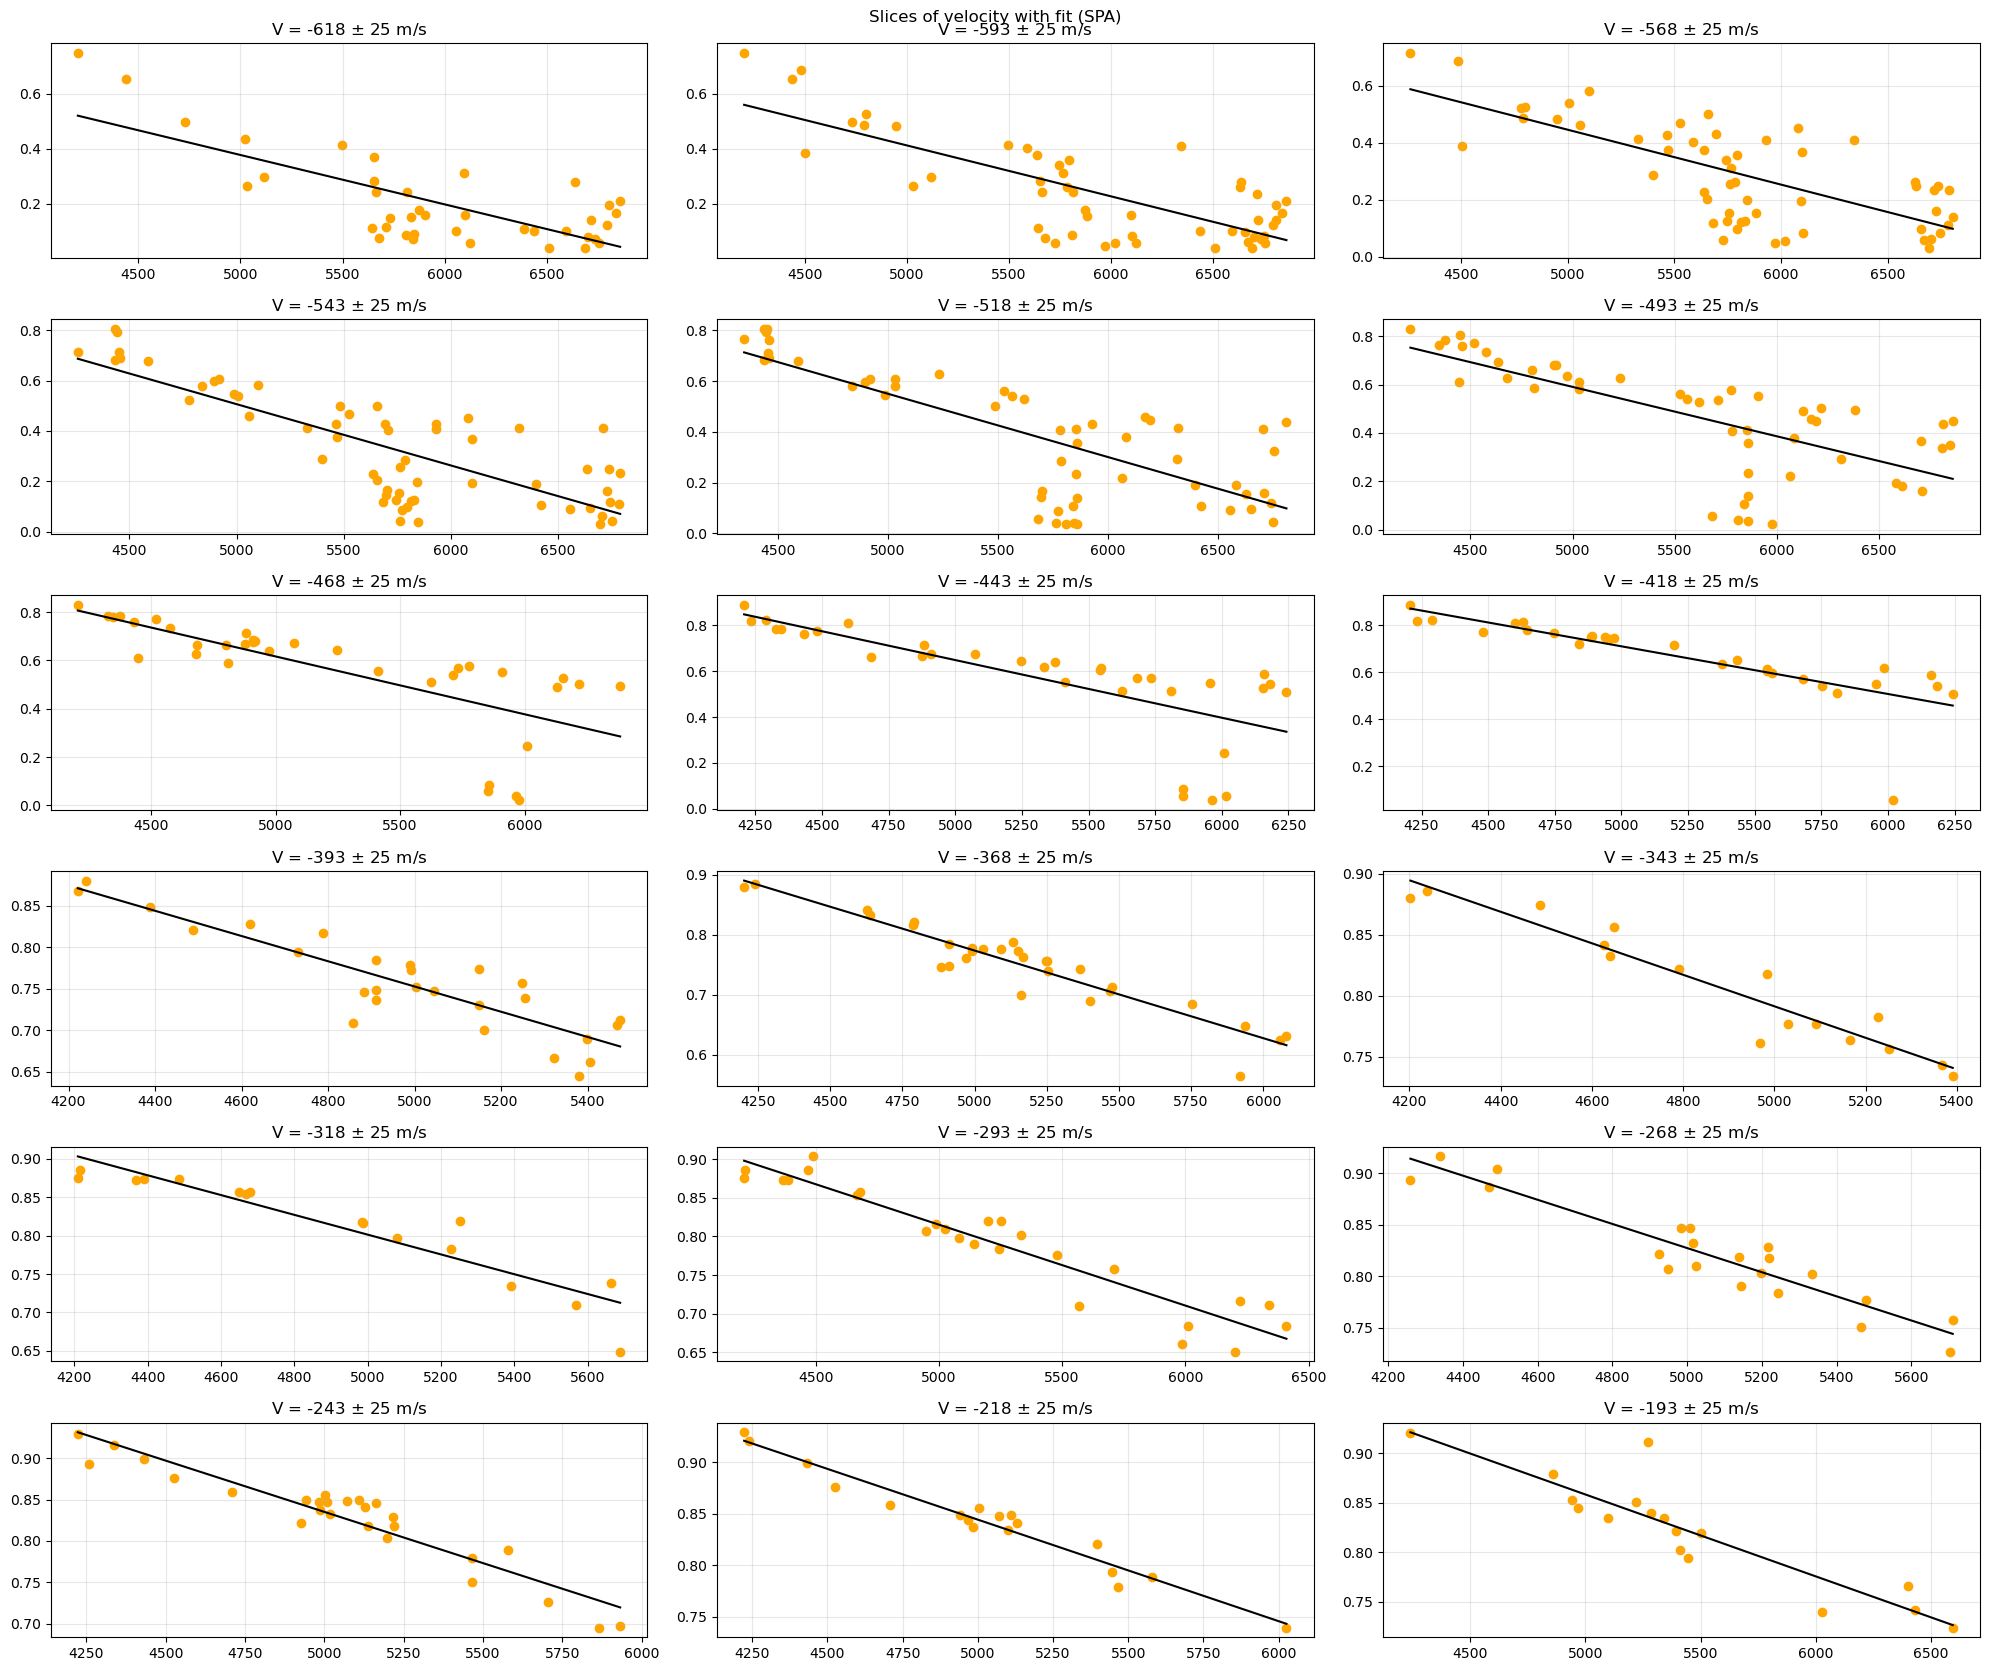

In [329]:
#Polynomial 1 order fit
fits_SPA = []
values_param = []
for i in range(0,len(New_Data_SPA)):
    pol = Polynomial.fit(New_Data_SPA[i]['Lambda observed'],1-New_Data_SPA[i]['Flux'], 1)
    param = pol.convert().coef
    values_flux = np.linspace(min(New_Data_SPA[i]['Lambda observed']), max(New_Data_SPA[i]['Lambda observed']), len(New_Data_SPA[i]['Lambda observed']))
    flux_fit = poly.polyval(values_flux,param)

    fits_SPA.append([values_flux,flux_fit])
    values_param.append(pd.DataFrame(param))

values_param = pd.concat(values_param,axis=1).T.reset_index(drop=True)
values_param.columns = ['Pendiente','B']

fig, axes = plt.subplots(6, 3, figsize=(20, 17))
fig.suptitle('Slices of velocity with fit (SPA)')
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(fits_SPA):
        ax.scatter(New_Data_SPA[i]['Lambda observed'],1-New_Data_SPA[i]['Flux'],color='orange')
        ax.plot(fits_SPA[i][0],fits_SPA[i][1],color='k')
        ax.set_title(f'V = {markers[i]} $\pm$ 25 m/s')
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [330]:
values_param

,Pendiente,B
0,1.276925,-0.000180
1,1.340494,-0.000186
2,1.404984,-0.000192
3,1.725107,-0.000244
4,1.795933,-0.000249
5,1.613738,-0.000205
6,1.814254,-0.000240
7,1.901870,-0.000251
8,1.726756,-0.000203
9,1.512639,-0.000152
